In [1]:
%matplotlib inline
#%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
from vStirap3lvlRunner import ExperimentalRunner, Atom, Cavity, LaserCoupling, CavityCoupling

In [2]:
'''
Set up system
'''

'''
class Atom(RunnerDataClass):
    atom_states: dict = field(default_factory=dict)
    M: int = 4
    gamma: float = 3 * 2. * np.pi
    branching_ratios: list = field(default_factory=list)
    R_AL: np.matrix = np.sqrt(1 / 2) * np.matrix([[1, i],
                                                  [i, 1]])
'''
gamma=3 * 2. * np.pi
branching_ratios = [0,0,1]

atom=Atom(gamma=gamma,
          branching_ratios=branching_ratios)

'''
class Cavity(RunnerDataClass):
    N: int = 2
    cavity_states: list = field(default_factory=list)
    g: float = 3 * 2. * np.pi
    kappa1: float = 3 * 2. * np.pi
    kappa2: float = 3 * 2. * np.pi
    deltaP: float = 0 * 2. * np.pi
    R_CL: np.matrix = np.matrix([[1, 0],
                                 [0, 1]])
    R_ML: np.matrix = np.sqrt(1 / 2) * np.matrix([[1, i],
                                                  [i, 1]])
'''
g0=24 * (2*np.pi)
kappa1,kappa2 = 19 * 2.*np.pi, 0.9 * 2.*np.pi
deltaP = 20 * 2.*np.pi

cavity=Cavity(g=g0,
              kappa1=kappa1,
              kappa2=kappa2,
              deltaP=deltaP)

In [3]:
'''
Set up couplings
'''

'''
class LaserCoupling(RunnerDataClass):
    omega0: float
    g: str
    x: str
    deltaL: float
    args_ham: dict
    pulse_shape: str = 'np.piecewise(t, [t<length_pulse], [np.sin((np.pi/length_pulse)*t)**2,0])'
'''
deltaL=0
length_pulse = 1
omega0=20 * 2 * np.pi

laser_couplings = []

for g_state, x_state, delta, _ in Atom.get_couplings_sigma_plus(deltaL):
    laser_couplings.append(LaserCoupling(omega0=omega0,
                                         g=g_state,
                                         x=x_state,
                                         deltaL=delta,
                                         args_ham={"length_pulse":length_pulse}))
    
'''
class CavityCoupling(RunnerDataClass):
    g0: float
    g: str
    x: str
    deltaC: float
    deltaM: int
'''
deltaC=0
cavity_couplings = []

for g_state, x_state, delta, deltaM in Atom.get_couplings_sigma_minus(deltaC):
    cavity_couplings.append(CavityCoupling(g0=cavity.g,
                                           g=g_state,
                                           x=x_state,
                                           deltaC=delta,
                                           deltaM=deltaM))

In [7]:
runner = ExperimentalRunner(atom=atom,
                            cavity=cavity,
                            laser_couplings=laser_couplings,
                            cavity_couplings=cavity_couplings,
                            verbose=True)

Pre-compiled Hamiltonian, ExperimentalRunner_Hamiltonian_0.pyx, is suitable to run this experiment.


In [8]:
t_length=1.2
n_steps=201
psi0=['gM',0,0]

results = runner.run(psi0=psi0)

Running simulation with 201 timesteps...

finished in 0.271 seconds
Found suitable _EmissionOperators obj for setup.
Found suitable _NumberOperators obj for setup.


Found suitable pre-computed number operator series.
Found suitable pre-computed emission operator series.
Photon emission: 0.958
Photon emission X, Y: 0.479 0.479


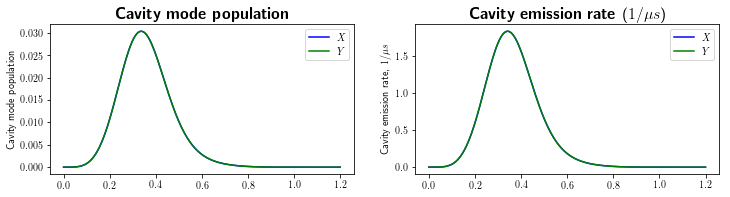

In [9]:
exp_anX, exp_anY = results.get_cavity_number(cavity.R_CL)
exp_emX, exp_emY = results.get_cavity_emission(cavity.R_CL)

t = results.output.times
tStep = np.mean(np.ediff1d(t))

n_X = np.trapz((exp_emX), dx=tStep)
n_Y = np.trapz((exp_emY), dx=tStep)
n_ph = n_X + n_Y

plt.rcParams['text.usetex'] = True

print('Photon emission:', np.round(n_ph,3))
print('Photon emission X, Y:', np.round(n_X,3), np.round(n_Y,3))

# Plot the results
f1, ((a1a, a1b)) = plt.subplots(1, 2, sharex=True, figsize=(12, 11./4))

a1a.set_title('\\textbf{Cavity mode population}', fontsize=16)
a1b.set_title('\\textbf{Cavity emission rate} ($1/\mu s$)', fontsize=16, fontweight='bold')

###
axA,axB = a1a,a1b

axA.plot(t, exp_anX, 'b', label='$X$')
axA.plot(t, exp_anY, 'g', label='$Y$')
axA.set_ylabel('Cavity mode population')
axA.legend(loc=1)

axB.plot(t, exp_emX, 'b', label='$X$')
axB.plot(t, exp_emY, 'g', label='$Y$')
axB.set_ylabel('Cavity emission rate, $1/\mu s$')
axB.legend(loc=1)